**In the following script i use the following models with TfidfVectorizer:**
* Logistic Regression
* SVC
* KNN
* Random Forest Classifier
* MLP Classifier
* Neural Networks

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
data= pd.read_csv(r'E:\BRACU\Thesis/propaganda_poster.csv', encoding= 'latin_1')
data.head()

FileNotFoundError: ignored

In [ ]:
data.sample(5)

,Unnamed: 0,Source,Propaganda text,Type
3041,NaN,https://content.libraries.wsu.edu/digital/coll...,[French Red Cross Encouraging Packages for Sol...,propaganda
1437,NaN,https://timesofindia.indiatimes.com/entertainm...,American Made,Non propaganda
946,NaN,https://www.imdb.com/title/tt15329266/?ref_=fn...,Symbols in Indian Politics,Non propaganda
1055,NaN,https://posteritati.com/genre/documentary?page=9,The James Dean Story,Non propaganda
68,NaN,https://posteritati.com/genre/documentary?page=7,Film Before Film,Non propaganda


In [ ]:
data.shape

(3055, 4)

In [ ]:
#Checking for missing values
data.isnull().sum()

Unnamed: 0         3055
Source                1
Propaganda text       1
Type                  0
dtype: int64

In [ ]:
#Dropping 2 columns that we don't need 
data.drop(['Unnamed: 0', 'Source'], axis=1, inplace=True)

In [ ]:
data.isnull().any()

Propaganda text     True
Type               False
dtype: bool

In [ ]:
#Dropping null rows
data.dropna(inplace=True)

In [ ]:
data.isnull().any()

Propaganda text    False
Type               False
dtype: bool

In [ ]:
#Checking for duplicate values
data.duplicated().sum()

184

In [ ]:
#Dropping duplicate values
data=data.drop_duplicates()

In [ ]:
data.shape

(2870, 2)

In [ ]:
data.head()

,Propaganda text,Type
0,The Company You Keep,Non propaganda
1,Rampage,Non propaganda
2,Before Sunset,propaganda
3,Sword Art Online: Progressive - Aria Of A Star...,Non propaganda
4,The Personal History Of David Copperfield,Non propaganda


In [ ]:
#Mapping the 'type' labels to 0 and 1
data['Type']=data['Type'].map({'Non propaganda': 0, 'propaganda': 1})
data.head()

,Propaganda text,Type
0,The Company You Keep,0
1,Rampage,0
2,Before Sunset,1
3,Sword Art Online: Progressive - Aria Of A Star...,0
4,The Personal History Of David Copperfield,0


In [ ]:
data['Type'].value_counts()

0    2297
1     573
Name: Type, dtype: int64

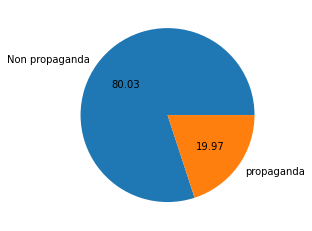

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['Type'].value_counts(), labels=['Non propaganda','propaganda'],autopct="%0.2f")
plt.show()

In [ ]:
import seaborn as sns
#Setting a color palette
palette=sns.color_palette('magma')
sns.set(palette=palette)

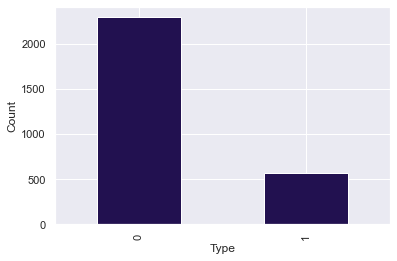

In [ ]:
#Plotting propaganda(1) vs Non propaganda(0) value counts
data['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
data['num_characters'] = data['Propaganda text'].apply(len)
data.head()

,Propaganda text,Type,num_characters
0,The Company You Keep,0,20
1,Rampage,0,7
2,Before Sunset,1,13
3,Sword Art Online: Progressive - Aria Of A Star...,0,56
4,The Personal History Of David Copperfield,0,41


In [ ]:
# num of words
data['num_words'] = data['Propaganda text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Propaganda text,Type,num_characters,num_words
0,The Company You Keep,0,20,4
1,Rampage,0,7,1
2,Before Sunset,1,13,2
3,Sword Art Online: Progressive - Aria Of A Star...,0,56,11
4,The Personal History Of David Copperfield,0,41,6


In [ ]:
data['num_sentences'] = data['Propaganda text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Propaganda text,Type,num_characters,num_words,num_sentences
0,The Company You Keep,0,20,4,1
1,Rampage,0,7,1,1
2,Before Sunset,1,13,2,1
3,Sword Art Online: Progressive - Aria Of A Star...,0,56,11,1
4,The Personal History Of David Copperfield,0,41,6,1


In [ ]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2870.000000,2870.000000,2870.000000
mean,22.626481,4.363415,1.026481
std,17.330804,3.520391,0.184808
min,2.000000,1.000000,1.000000
25%,12.000000,2.000000,1.000000
50%,18.000000,3.000000,1.000000
75%,28.000000,6.000000,1.000000
max,232.000000,43.000000,5.000000


In [ ]:
# Non propaganda
data[data['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2297.000000,2297.00000,2297.000000
mean,19.065303,3.57771,1.012190
std,11.909871,2.40303,0.121077
min,2.000000,1.00000,1.000000
25%,11.000000,2.00000,1.000000
50%,16.000000,3.00000,1.000000
75%,24.000000,5.00000,1.000000
max,97.000000,16.00000,3.000000


In [ ]:
#Propaganda
data[data['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,573.000000,573.000000,573.000000
mean,36.902269,7.513089,1.083770
std,26.116352,5.154120,0.329173
min,4.000000,1.000000,1.000000
25%,21.000000,4.000000,1.000000
50%,31.000000,6.000000,1.000000
75%,43.000000,9.000000,1.000000
max,232.000000,43.000000,5.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

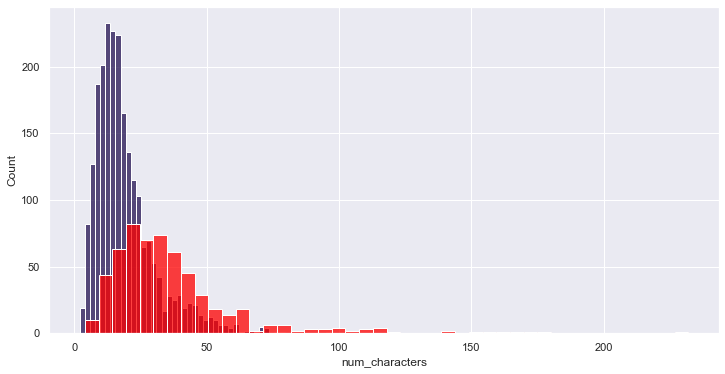

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Type'] == 0]['num_characters'])
sns.histplot(data[data['Type'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

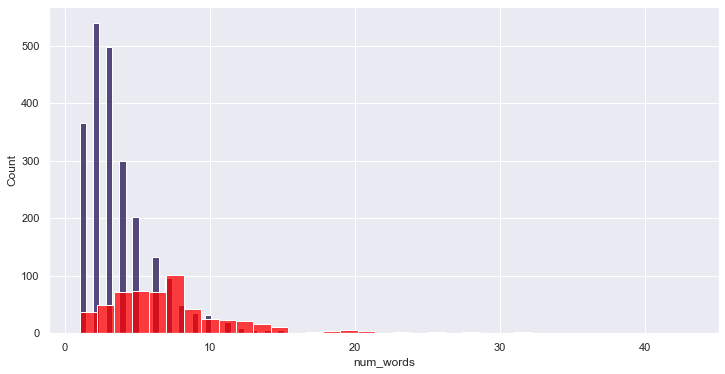

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Type'] == 0]['num_words'])
sns.histplot(data[data['Type'] == 1]['num_words'],color='red')

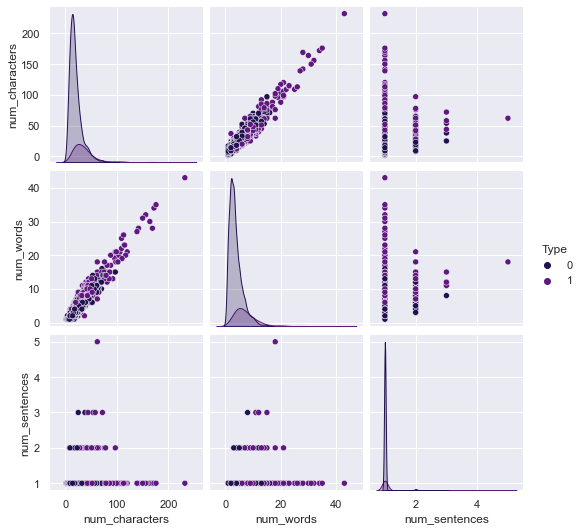

In [ ]:
sns.pairplot(data,hue='Type')

# 3. Data Preprocessing
Lower case, 
Tokenization, 
Removing special characters, 
Removing stop words and punctuation, 
Stemming

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
data['Propaganda text'][3]

'Sword Art Online: Progressive - Aria Of A Starless Night'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
data['transformed_text'] = data['Propaganda text'].apply(transform_text)

In [ ]:
data.head()

,Propaganda text,Type,num_characters,num_words,num_sentences,transformed_text
0,The Company You Keep,0,20,4,1,compani keep
1,Rampage,0,7,1,1,rampag
2,Before Sunset,1,13,2,1,sunset
3,Sword Art Online: Progressive - Aria Of A Star...,0,56,11,1,sword art onlin progress aria starless night
4,The Personal History Of David Copperfield,0,41,6,1,person histori david copperfield


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
propaganda_corpus = []
for msg in data[data['Type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        propaganda_corpus.append(word)

In [ ]:
len(propaganda_corpus)

2273

H:\Anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


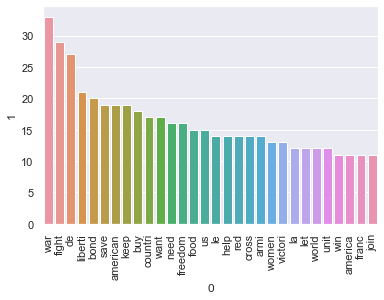

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(propaganda_corpus).most_common(30))[0],pd.DataFrame(Counter(propaganda_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
nonpropaganda_corpus = []
for msg in data[data['Type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        nonpropaganda_corpus.append(word)


In [ ]:
len(nonpropaganda_corpus)

5375

H:\Anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


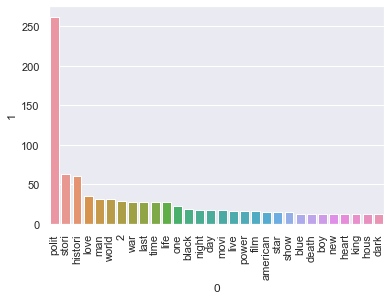

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(nonpropaganda_corpus).most_common(30))[0],pd.DataFrame(Counter(nonpropaganda_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
data.head()

,Propaganda text,Type,num_characters,num_words,num_sentences,transformed_text
0,The Company You Keep,0,20,4,1,compani keep
1,Rampage,0,7,1,1,rampag
2,Before Sunset,1,13,2,1,sunset
3,Sword Art Online: Progressive - Aria Of A Star...,0,56,11,1,sword art onlin progress aria starless night
4,The Personal History Of David Copperfield,0,41,6,1,person histori david copperfield


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Propaganda text'], data['Type'], test_size=0.2)
X_train.head()

37                                 A Private War
2631         Lock, Stock and Two Smoking Barrels
2878    Bunkar: The Last Of The Varanasi Weavers
2636                           Office Politics 2
1535              For Gunpowder, Save Waste Fats
Name: Propaganda text, dtype: object

In [ ]:
acc = []

In [ ]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    a='{:.2%}'.format(accuracy_score(y_valid, y_pred))
    acc.append(a)
    print(classification_report(y_test, y_pred))
    

    
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show() 
    return cm


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)
tfidf_matrix_train.shape


(2296, 3201)

# **KNN**

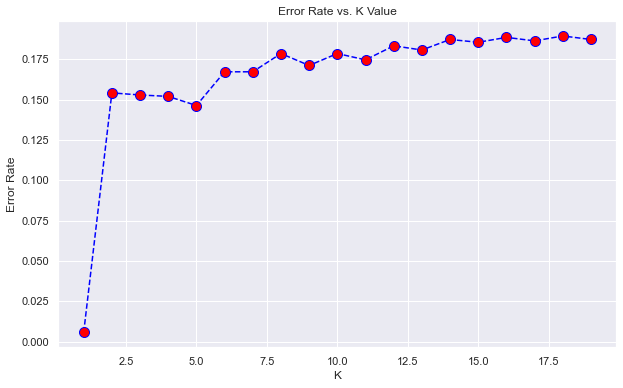

In [ ]:
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value: K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

KNN Accuracy Score: 83.45%
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       450
           1       0.84      0.29      0.43       124

    accuracy                           0.83       574
   macro avg       0.84      0.64      0.67       574
weighted avg       0.83      0.83      0.80       574



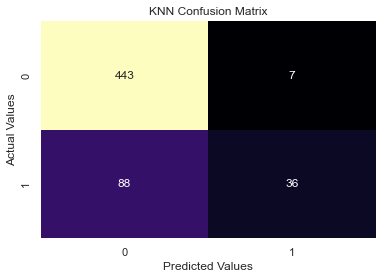

In [ ]:
#Fitting the KMM model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

# Logistic Regression

Logistic Regression: Accuracy Score: 83.80%
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       450
           1       0.92      0.27      0.42       124

    accuracy                           0.84       574
   macro avg       0.88      0.63      0.66       574
weighted avg       0.85      0.84      0.80       574



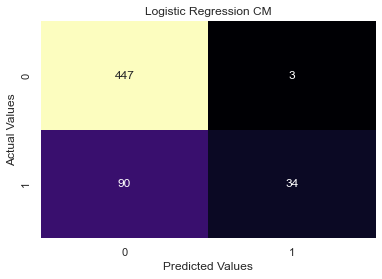

array([[447,   3],
       [ 90,  34]], dtype=int64)

In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

# **Random Forest Classifier**

Random Forest Accuracy Score: 87.11%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       450
           1       0.82      0.52      0.63       124

    accuracy                           0.87       574
   macro avg       0.85      0.74      0.78       574
weighted avg       0.87      0.87      0.86       574



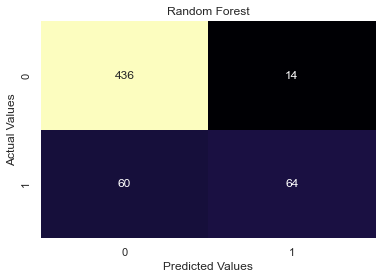

[[436  14]
 [ 60  64]]


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))

In [ ]:
#from IPython.display import display
dictionary = {'Model' : ['Logistic Regression', 'KNN', 'Random Forest'],
        'Accuracy Score' : acc}
df=pd.DataFrame.from_dict(dictionary)
print(dictionary)                               
#df = pd.DataFrame(dict)
display(df)

{'Model': ['Logistic Regression', 'KNN', 'Random Forest'], 'Accuracy Score': ['83.45%', '83.80%', '87.11%']}


,Model,Accuracy Score
0,Logistic Regression,83.45%
1,KNN,83.80%
2,Random Forest,87.11%
